In [227]:
import pandas as pd

train_data = pd.read_csv("titanic.csv")

In [228]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [229]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
train_data.shape

(891, 12)

In [231]:
from pandas import Categorical

train_data["Sex"] = Categorical(train_data["Sex"]).codes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int8   
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [232]:
from pandas import get_dummies

train_data = get_dummies(data=train_data, columns=["Embarked"])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [233]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

<AxesSubplot:>

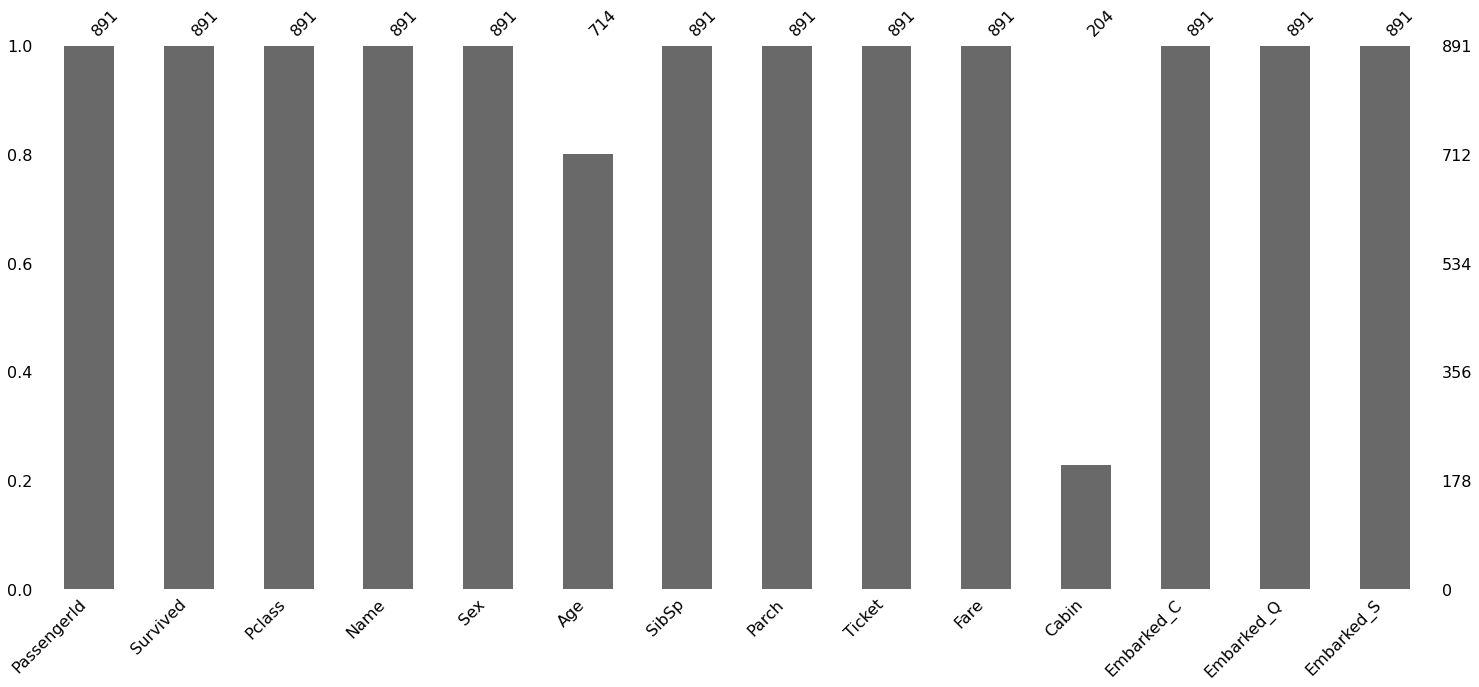

In [234]:
import missingno as msno
msno.bar(train_data)

In [235]:
train_data = train_data.drop(columns="Cabin")

In [236]:
data2 = train_data.copy(deep=True)

In [237]:
avg = train_data["Age"].mean()
avg

29.69911764705882

In [238]:
train_data["Age"].fillna(avg,inplace = True)

In [239]:
train_data = train_data.drop(columns="Name")
train_data = train_data.drop(columns="Ticket")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,-0.001205,0.168240,-0.243292,-0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624


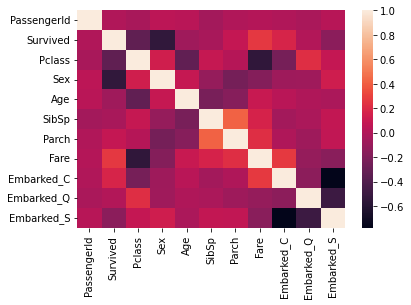

In [240]:
from seaborn import heatmap

heatmap(train_data.corr())
train_data.corr()

In [241]:
train_data = train_data.drop(columns="PassengerId")

In [242]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [243]:
train_data.shape

(891, 10)

<AxesSubplot:>

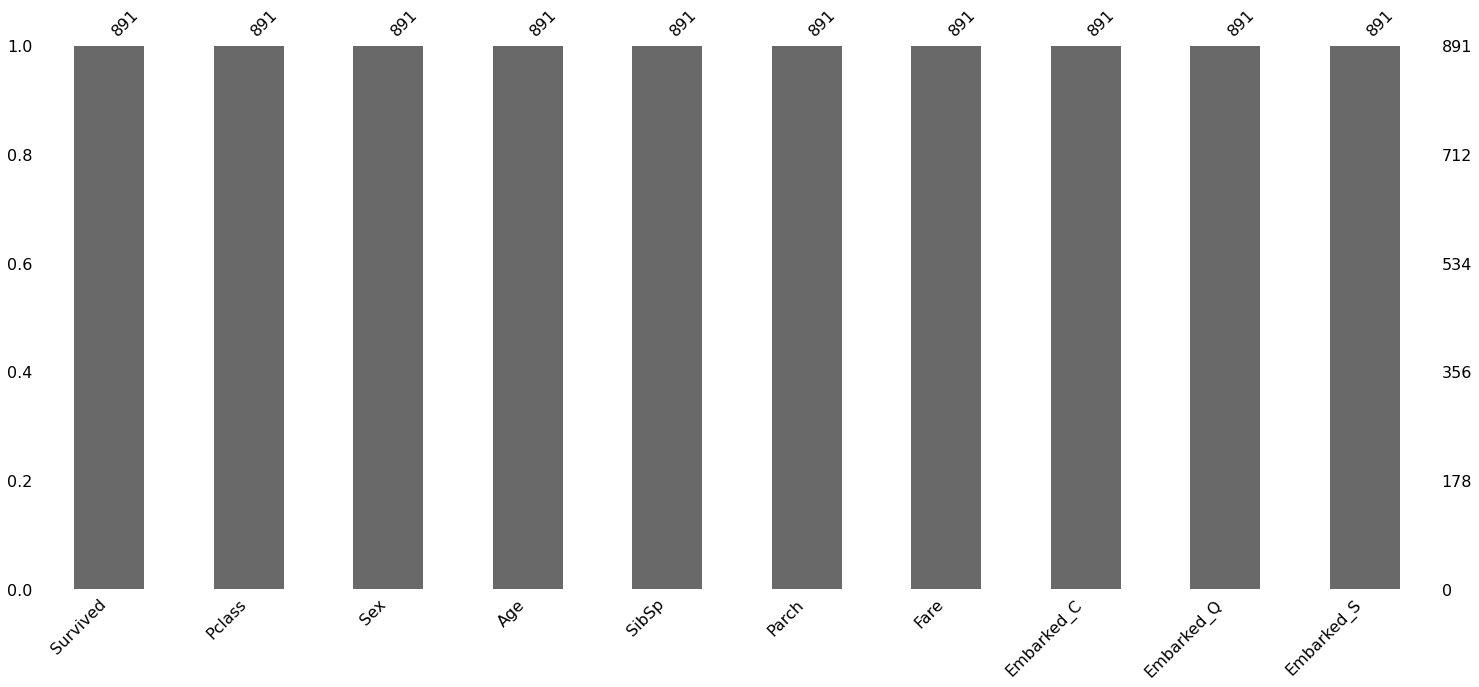

In [244]:
msno.bar(train_data)

In [245]:
data3 = train_data
trash = data3[(data3["Embarked_C"] == 0) & (data3["Embarked_Q"] == 0) & (data3["Embarked_S"] == 0)]
print(len(trash))
if (len(trash) / len(train_data)) < 1/10:
    train_data.drop(trash.index,inplace=True )
    


2


In [246]:
train_data.shape

(889, 10)

In [247]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

data_columns = train_data.columns
scaler = MinMaxScaler()
train_data = DataFrame(scaler.fit_transform(train_data))
train_data.columns = data_columns
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


In [248]:
train_data_linear = train_data.dropna(inplace=False, subset=["Age"])

In [249]:
train_data.shape

(889, 10)

In [250]:
from sklearn.model_selection import train_test_split

x = train_data_linear["SibSp"]
y = train_data_linear["Age"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0, shuffle=True
)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

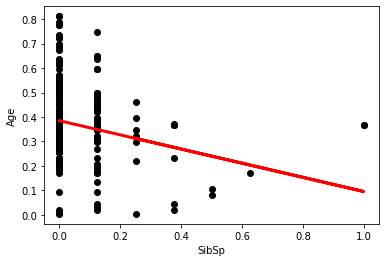

In [251]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

plt.scatter(x_test, y_test, color="black")
plt.xlabel("SibSp")
plt.ylabel("Age")
plt.plot(x_test, predict, color="red", linewidth=3)

In [252]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predict)
MSE = mean_squared_error(y_test, predict)
print(r2)
print(MSE)

0.03331381608629291
0.023830319448716213


In [253]:
print(min(y_test))
print(max(y_test))

0.0041467705453631576
0.8115104297562202


In [254]:
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

x = x.values.reshape(-1, 1)

scores_r2 = cross_val_score(model, x, y, scoring="r2", cv=10)
scores_mse = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
print("mean: ", mean(scores_r2), " std: ", stdev(scores_r2))
print("mean: ", mean(scores_mse), " std: ", stdev(scores_mse))

mean:  0.02524390193168021  std:  0.04479335566577733
mean:  -0.02529270363559534  std:  0.003568312766890558


In [255]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits=10, shuffle=True, random_state=0)
hyper_params = [{"n_features_to_select": list(range(1, train_data.shape[1]))}]

X = train_data_linear.drop(inplace=False, columns=["Age"]).drop(columns="Survived")
model.fit(X, y)
model_rfe = RFE(model)

model_cv = GridSearchCV(
    estimator=model_rfe,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=folds,
    verbose=1,
    return_train_score=True,
)

model_cv.fit(X, y)
model_cv.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


{'n_features_to_select': 8}

Zadanie 5

In [258]:
y_train = train_data_linear["Age"]
x_train = train_data_linear.drop(columns=["Survived", "Age"])

x_test = data2[data2["Age"].isna()]
#x_test.drop(columns=["Survived", "Age"],inplace=True)

#model.fit(x_train, y_train)
#rfe_model = RFE(model, n_features_to_select=8)
#rfe_model.fit(x_train, y_train)
x_test.head()
#predict = rfe_model.predict(x_test)

#train_data.loc[train_data["Age"].isna(), "Age"] = predict

#train_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,0,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,0,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,1,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,0,1,0
